In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from keras.models import Sequential, load_model
from keras.layers import Dense
from keras.utils import to_categorical

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

TypeError: Descriptors cannot be created directly.
If this call came from a _pb2.py file, your generated code is out of date and must be regenerated with protoc >= 3.19.0.
If you cannot immediately regenerate your protos, some other possible workarounds are:
 1. Downgrade the protobuf package to 3.20.x or lower.
 2. Set PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION=python (but this will use pure-Python parsing and will be much slower).

More information: https://developers.google.com/protocol-buffers/docs/news/2022-05-06#python-updates

In [2]:
# carrega o dataset iris
data = load_iris()
X = data.data
Y = to_categorical(data.target)

# mostra a estrutura dos dados de entrada X e de saída Y
print('Formato dos dados:')
print(X.shape)
print(Y.shape)

# mostra os primeiros exemplos do dataset (entrada e saída)
print('Primeiro exemplo do dataset:')
print('Entrada:', X[0])
print('Saida:', Y[0])

Formato dos dados:
(150, 4)
(150, 3)
Primeiro exemplo do dataset:
Entrada: [5.1 3.5 1.4 0.2]
Saida: [1. 0. 0.]


In [3]:
# separa 20% do dataset para servir como base de teste
# 80% dos dados serão usados para treinar a RNA
# 20% dos dados serão usados para testar a RNA
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(120, 4)
(30, 4)
(120, 3)
(30, 3)


In [4]:
# define a estrutura da RNA
model = Sequential()
model.add(Dense(6, kernel_initializer='normal', input_dim=4, activation='relu'))
model.add(Dense(3, kernel_initializer='normal', activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [5]:
# treina a RNA
history = model.fit(X_train, Y_train, validation_split=0.20, epochs=20)

Epoch 1/20
3/3 [==============================] - 2s 205ms/step - loss: 1.0976 - accuracy: 0.3542 - val_loss: 1.0989 - val_accuracy: 0.2917
Epoch 2/20
3/3 [==============================] - 0s 65ms/step - loss: 1.0966 - accuracy: 0.3542 - val_loss: 1.0991 - val_accuracy: 0.2917
Epoch 3/20
3/3 [==============================] - 0s 41ms/step - loss: 1.0957 - accuracy: 0.3021 - val_loss: 1.0992 - val_accuracy: 0.3333
Epoch 4/20
3/3 [==============================] - 0s 41ms/step - loss: 1.0949 - accuracy: 0.4271 - val_loss: 1.0993 - val_accuracy: 0.2083
Epoch 5/20
3/3 [==============================] - 0s 36ms/step - loss: 1.0939 - accuracy: 0.3542 - val_loss: 1.0995 - val_accuracy: 0.2083
Epoch 6/20
3/3 [==============================] - 0s 44ms/step - loss: 1.0928 - accuracy: 0.3646 - val_loss: 1.0995 - val_accuracy: 0.2083
Epoch 7/20
3/3 [==============================] - 0s 90ms/step - loss: 1.0919 - accuracy: 0.3646 - val_loss: 1.0993 - val_accuracy: 0.2083
Epoch 8/20
3/3 [==========

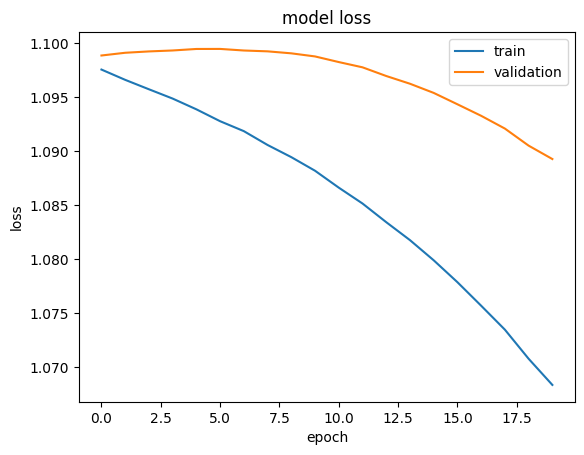

In [6]:
# mostra o histórico da função perda
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [7]:
# avalia o desempenho da RNA na base de treinamento
train_loss, train_acc = model.evaluate(X_train, Y_train, verbose=0)

#print('Train loss:', train_loss)
print('Train acc:', train_acc)

# avalia o desempenho da RNA na base de teste (que nunca foi apresentada para a RNA no seu treinamento)
test_loss, test_acc = model.evaluate(X_test, Y_test, verbose=0)

#print('Test loss:', test_loss)
print('Test acc:', test_acc)

Train acc: 0.3333333432674408
Test acc: 0.3333333432674408


In [8]:
# exemplo de como realizar a predição de um exemplo qualquer
predict = model.predict(X_test[1:2])

print(X_test[1:2])
print(Y_test[1:2])
print(predict)

1/1 [==============================] - 0s 161ms/step
[[5.7 3.8 1.7 0.3]]
[[1. 0. 0.]]
[[0.37347907 0.32814616 0.29837477]]
